# <font color='blue'> **1. Getting Started with pandas**
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png' width = 500 height = 200>

- Pandas : Data Manipulation
-	DataFrame이 무엇인지에 대해 이해한다.
-	cv파일, excell파일, DB의 데이터를 가져오고 저장해 본다.
-	탐색적 데이터 분석(Exploratory Data Analysis)을 수행해 본다.
-	필요한 데이터를 선택해 가져와 본다.
-	변수를 만들어 DataFrame 에 추가하고 삭제한다.
-	DataFrame을 서로 연결한다.

> pandas is a data analysis library for providing high-performance, **easy-to- use data structures and data analysis tools** for the Python programming language.

- Because pandas is built on top of Cython and NumPy, it has less memory overhead and runs quicker than pure Python code.
  
- **While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneously-typed numerical array data.**




In [ ]:
import pandas 
pandas.show_versions()


INSTALLED VERSIONS
------------------
commit           : ca60aab7340d9989d9428e11a51467658190bb6b
python           : 3.9.16.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.147+
Version          : #1 SMP Sat Dec 10 16:00:40 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.4.4
numpy            : 1.22.4
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : 67.6.1
pip              : 22.0.4
Cython           : 0.29.34
pytest           : 7.2.2
hypothesis       : None
sphinx           : 3.5.4
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli           :

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
pd.options.display.max_rows = 20
np.set_printoptions(precision=4)

## Introduction to pandas Data Structures

- Two workhorse data structures: Series and DataFrame. 

- While they are not a universal solution for every problem, they provide a solid foundation for a wide variety of data tasks.

![](/Users/shamsuddeenmuhammad/Documents/VScode/python4dataanalysis/images/dataframe.png)

### Series

- A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. 

- The simplest Series is formed from only an array of data:



In [ ]:
#from pandas import Series, DataFrame

In [ ]:
obj = pd.Series([4, 7, -5, 3]) # index on the left and the values on the right.
obj

0    4
1    7
2   -5
3    3
dtype: int64

> A default index consisting of the integers 0 through N - 1 (where N is the length of the data) is created

In [ ]:
obj_np = np.array([4, 7, -5, 3])
obj_np

array([ 4,  7, -5,  3])

> The result of the .array attribute is usually a NumPy array, but can also contain special extension array types which will be discussed more in Advanced pandas.



In [ ]:
obj.values

array([ 4,  7, -5,  3])

In [ ]:
obj.index  # like range(4)

RangeIndex(start=0, stop=4, step=1)

Often it will be desirable to create a Series with an index identifying each data point with a label:



In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Compared with NumPy arrays, you can use labels in the index when selecting single values or a set of values:

In [ ]:
np_array = np.array([22,4,5])

In [ ]:
np_array[0:2]

array([22,  4])

In [ ]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2['a']

-5

In [ ]:
obj2['d'] = 6
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

> Here ['c', 'a', 'd'] is interpreted as a list of indices, even though it contains strings instead of integers.



Using NumPy functions or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:



In [ ]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [ ]:
obj2 * 2


d    12
b    14
a   -10
c     6
dtype: int64

In [ ]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

> Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping of index values to data values. It can be used in many contexts where you might use a dict:



In [ ]:
'b' in obj2

True

In [ ]:
'e' in obj2

False

## Creating Series from Dictionary

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

> When you are only passing a dict, the index in the resulting Series will respect the order of the keys according to the dict's keys method, which depends on the key insertion order. 

You can override this by passing an index with the dict keys in the order you want them to appear in the resulting Series:



In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Three values found in **sdata** were placed in the appropriate locations, but since no value for 'California' was found, it appears as NaN (not a number), which is considered in pandas to mark missing or NA values. Since 'Utah' was not included in states, it is excluded from the resulting object.



“missing”, “NA”, or “null” interchangeably to refer to missing data. The isna and notna functions in pandas should be used to detect missing data:



In [ ]:
pd.isnull(obj4)
# pd.notnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Series also has these as instance methods:



In [ ]:
obj4.isna()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations:



In [ ]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
obj4


California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Data alignment features will be addressed in more detail later. If you have experience with databases, you can think about this as being similar to a join operation.



> Both the Series object itself and its index have a name attribute, which integrates with other areas of pandas functionality:



In [ ]:
obj4.name = 'population'
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [ ]:
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

A Series’s index can be altered in-place by assignment:



In [ ]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

- A DataFrame represents a rectangular table of data and contains an ordered, named collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). 

- The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index.

![](/Users/shamsuddeenmuhammad/Documents/VScode/python4dataanalysis/dataframe_dictionary.png)

There are many ways to construct a DataFrame, though one of the most common is from a dict of equal-length lists or NumPy arrays:



### Dataframe from Dictionary

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [ ]:
frame = pd.DataFrame(data)

The resulting DataFrame will have its index assigned automatically as with Series, and the columns are placed according to the order of the keys in data (which depends on their insertion order in the dict):



In [ ]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


> While a DataFrame is physically two-dimensional, you can use it to represent higher dimensional data in a tabular format using hierarchical indexing! We will discuss it.

In [ ]:
frame.head() #For large DataFrames, the head method selects only the first five rows:

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:



In [ ]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


If you pass a column that isn’t contained in the dict, it will appear with missing values in the result:



In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2


,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation, or by attribute:



In [ ]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

- Attribute-like access (e.g., frame2.year) and tab completion of column names in IPython is provided as a convenience.

- frame2[column] works for any column name, but frame2.column only works when the column name is a valid Python variable name and does not conflict with any of the method names in DataFrame.

In [ ]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

Rows can also be retrieved by position or name with the special loc attribute (much more on this later):



In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Columns can be modified by assignment. For example, the empty 'debt' column could be assigned a scalar value or an array of values:



In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2['debt'] = 16.5
frame2


,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [ ]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


> When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame. 



In [ ]:
# frame2['debt'] = np.arange(5.) # error

In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [ ]:
frame2.iloc[:,1:3]

,state,pop
one,Ohio,1.5
two,Ohio,1.7
three,Ohio,3.6
four,Nevada,2.4
five,Nevada,2.9
six,Nevada,3.2


If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any index values not present:

In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assigning a column that doesn’t exist will create a new column. The del keyword will delete columns like with a dict.



> Example of delete

In [ ]:
a =  (frame2.state == 'Ohio')
a

one       True
two       True
three     True
four     False
five     False
six      False
Name: state, dtype: bool

In [ ]:
frame2['sham'] = a
frame2

,year,state,pop,debt,sham
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


Note: New columns cannot be created with the frame2.eastern syntax.



In [ ]:
frame2.iloc[1:2]

,year,state,pop,debt,sham
two,2001,Ohio,1.7,-1.2,True


In [ ]:
del frame2['eastern']
frame2

KeyError: ignored

> The column returned from indexing a DataFrame is a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the DataFrame. The column can be explicitly copied with the Series’s copy method.



Another common form of data is a nested dict of dicts:



In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys as the columns and the inner keys as the row indices:



In [ ]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


The keys in the inner dicts are combined to form the index in the result. This isn’t true if an explicit index is specified:



In [ ]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


You can transpose the DataFrame (swap rows and columns) with similar syntax to a NumPy array:



In [ ]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


Dicts of Series are treated in much the same way:



In [ ]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame3['Ohio'][:-1]

2001    1.7
2002    3.6
Name: Ohio, dtype: float64

In [ ]:
frame3['Nevada'][:2]

2001    2.4
2002    2.9
Name: Nevada, dtype: float64

In [ ]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


> If a DataFrame’s index and columns have their name attributes set, these will also be displayed:



In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [ ]:
frame2.values

array([[2000, 'Ohio', 1.5, nan, True],
       [2001, 'Ohio', 1.7, -1.2, True],
       [2002, 'Ohio', 3.6, nan, True],
       [2001, 'Nevada', 2.4, -1.5, False],
       [2002, 'Nevada', 2.9, -1.7, False],
       [2003, 'Nevada', 3.2, nan, False]], dtype=object)

DataFrame's to_numpy method returns the data contained in the DataFrame as a two-dimensional ndarray:



In [ ]:
frame3.to_numpy()

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

If the DataFrame’s columns are different dtypes, the dtype of the returned array will be chosen to accommodate all of the columns:



In [ ]:
frame2.to_numpy()

array([[2000, 'Ohio', 1.5, nan, True],
       [2001, 'Ohio', 1.7, -1.2, True],
       [2002, 'Ohio', 3.6, nan, True],
       [2001, 'Nevada', 2.4, -1.5, False],
       [2002, 'Nevada', 2.9, -1.7, False],
       [2003, 'Nevada', 3.2, nan, False]], dtype=object)

### Index Objects

> pandas’s Index objects are responsible for holding the axis labels and other metadata (like the axis name or names). 

Any array or other sequence of labels you use when constructing a Series or DataFrame is internally converted to an Index:

In [ ]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [ ]:
index = obj.index
index


Index(['a', 'b', 'c'], dtype='object')

In [ ]:
index[1:]

Index(['b', 'c'], dtype='object')

> Index objects are immutable and thus can’t be modified by the user:



index[1] = 'd'  # TypeError index is immutable

Immutability makes it safer to share Index objects among data structures:



In [ ]:
labels = pd.Index(np.arange(3))
labels


Int64Index([0, 1, 2], dtype='int64')

In [ ]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2


0    1.5
1   -2.5
2    0.0
dtype: float64

In [ ]:
obj2.index is labels

True

In [ ]:
frame3
frame3.columns
'Ohio' in frame3.columns
2003 in frame3.index

False

In [ ]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

## Essential Functionality

- This section will walk you through the fundamental mechanics of interacting with the data contained in a Series or DataFrame. 
- We will explore data analysis and manipulation topics using pandas. 
  
- we'll focus on familiarizing you with heavily-used Pandas features, leaving the less common (i.e., more esoteric) things for you to learn more about by reading the online pandas documentation.

### Reindexing

An important method on pandas objects is reindex, which means to create a new object with the values rearranged to align with the new index. 


> Re-indexing Series

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

> missing values if any index values were not already present, missing value is introduce

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

> For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The method option allows us to do this, using a method such as ffill, which forward-fills the values:



In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3


0      blue
2    purple
4    yellow
dtype: object

In [ ]:
obj3.reindex(range(6), method='bfill') # pad (ffill), nearest, backfill(bfill)

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

> Reindessing Dataframe

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame


,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


With DataFrame, reindex can alter either the (row) index, columns, or both. 


> When passed only a sequence, it reindexes the rows in the result:


In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


> We can reindex column with a "columns"  keyword 

In [ ]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Note : you can also reindex by using the "loc" operator, and many users prefer to always do it that way. This only works if all of the new index labels already exist in the DataFrame (whereas reindex will insert missing data for new labels)

In [ ]:

frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


This will work since new index labels already exist in the DataFrame 

In [ ]:
states = ['Texas', 'Ohio', 'California']

frame.loc[['a', 'd', 'd'], states]

,Texas,Ohio,California
a,1,0,2
d,7,6,8
d,7,6,8


This will not work since new index labels is does not exist in the DataFrame 

In [ ]:
states = ['Texas', 'Utah', 'California']

frame.loc[['a', 'c', 'd'], states]

KeyError: ignored

### Dropping Entries from an Axis

- Dropping one or more entries from an axis is simple if you already have an index array or list without those entries, since you can use the reindex method or .loc-based indexing. 

- As that can require a bit of munging and set logic, the drop method will return a new object with the indicated value or values deleted from an axis:

Dropping in Series

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj


a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [ ]:
new_obj = obj.drop('c')
new_obj


a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

Dropping in Dataframe: With DataFrame, index values can be deleted from either axis. 


In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Calling drop with a sequence of labels will drop values from the row labels (axis 0):



In [ ]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


You can drop values from the columns by passing axis=1 or axis='columns':



In [ ]:
data.drop('two', axis=1)


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [ ]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


> Functions, like drop, which modify the size or shape of a Series or DataFrame, can manipulate an object in-place without returning a new object:

In [ ]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [ ]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

> Be careful with the inplace, as it destroys any data that is dropped. If we could go back in time, we probably would choose to not provide in-place options in many functions.



### Indexing, Selection, and Filtering

##### Indexing: Series

> Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers. Here are some examples of this:

In [ ]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [ ]:
obj['b'] # using index value

1.0

In [ ]:
obj[1] # using integer


1.0

In [ ]:
# obj[2:4] # pandas slice inclusive
obj[['b', 'a', 'd']]
# obj[[1, 3]]
# obj[obj < 2]

b    1.0
a    0.0
d    3.0
dtype: float64

> Prefered way of Selection : Loc and Iloc on Series: 

While you can select data by label this way, the preferred way to select index values is the special**loc operator**:

In [ ]:
# instead of this
obj[['b']] # using index value

b    1.0
dtype: float64

In [ ]:
# This is preferred
obj.loc[['b']]

b    1.0
dtype: float64

In [ ]:
# obj[['b', 'a', 'd']] is equivalent to obj.loc[['b', 'a', 'd']]
obj.loc[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

> The reason to prefer loc is because of the different treatment of integers when indexing with []. Regular []-based indexing will treat integers as labels if the index contains integers, so the behavior differs depending on the data type of the index. For example:



In [ ]:
obj1 = pd.Series([1, 2, 3], index=[2, 0, 1])
obj2 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])

In [ ]:
obj1

2    1
0    2
1    3
dtype: int64

In [ ]:
obj1[1]

3

In [ ]:
type(obj1[1])

numpy.int64

In [ ]:
obj1
obj1[[0, 1, 2]]

0    2
1    3
2    1
dtype: int64

In [ ]:
type(obj1[[0, 1, 2]])

pandas.core.series.Series

In [ ]:
obj1

2    1
0    2
1    3
dtype: int64

In [ ]:
obj1[[0, 1, 2]]

0    2
1    3
2    1
dtype: int64

In [ ]:
obj2

a    1
b    2
c    3
dtype: int64

In [ ]:
obj2[[0, 1, 2]]

a    1
b    2
c    3
dtype: int64

> With loc, the expression obj.loc[[0, 1, 2]] will fail when the index does not contain integers:



> come back this section

In [ ]:
obj1.loc[[0, 1, 2]]

0    2
1    3
2    1
dtype: int64

In [ ]:
obj2.loc[['b', 'a', 'c']]

b    2
a    1
c    3
dtype: int64

In [ ]:
obj2.loc[[0,1,2]] #With loc, the expression obj.loc[[0, 1, 2]] will fail when the index does not contain integers:

KeyError: ignored

Since loc operator indexes exclusively with labels, there is also a iloc operator that indexes exclusively with integers to work consistently whether the index contains integers or not:



In [ ]:
obj1

In [ ]:
obj1.iloc[[0, 1, 2]]

In [ ]:
obj2.iloc[[0, 1, 2]]

a    1
b    2
c    3
dtype: int64

You can also slice with labels, but it works differently from normal Python slicing in that the endpoint is inclusive:

In [ ]:
obj.loc['b':'c']

b    1.0
c    2.0
dtype: float64

You can modify series using loc

In [ ]:
obj.loc['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

##### Indexing: Dataframe

> Indexing into a DataFrame is for retrieving one or more columns either with a single value or sequence:

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [ ]:
type(data['two'])

pandas.core.series.Series

In [ ]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


- Indexing like this has a few special cases. 
    - First, slicing or selecting data with a boolean array:


> First, slicing or selecting data with a boolean array:

In [ ]:
data[:2]
#passing a single element or a list to the [] operator selects columns.

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data < 5
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Selection with loc and iloc

> Like Series, DataFrame has special operators loc and iloc for label-based and integer-based indexing, respectively. Since DataFrame is two-dimensional, you can select a subset of the rows and columns with NumPy-like notation using either axis labels (loc) or integers (iloc).



In [ ]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Selecting a single row and multiple columns by label

In [ ]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

Some similar selections with integers using iloc

In [ ]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [ ]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [ ]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


> Slicing DataFrame

Both indexing functions work with slices in addition to single labels or lists of labels:



In [ ]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
#Slicing rows
data.loc[:'Utah', 'two'] # This is equivalent to data.loc[:'Utah', ['two']]

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [ ]:
data.iloc[:, :3][data.three > 5] # 

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


> So there are many ways to select and rearrange the data contained in a pandas object.

<img src='https://raw.githubusercontent.com/shmuhammad2004/python_for_data_analysis_3/263336eee6d4cb2dfd2c864c4441d4f139d08410//images/indexingmethods.png'>

![](images/indexingmethods.png)

### Integer Indexing Pitfalls


Python

In [ ]:
ser_python = [1, 2, 3]

In [ ]:
ser_python[1]

2

In [ ]:
ser_python[-1]

3

Series

- Working with pandas objects indexed by integers is something that often trips up new users due to some differences with indexing semantics on built-in Python data structures like lists and tuples. 


In [ ]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
ser[1]

1.0

In [ ]:
ser[-1]

KeyError: ignored

- In this case, pandas could “fall back” on integer indexing, but it's difficult to do this in general without introducing subtle bugs.

- Here we have an index containing 0, 1, 2, but inferring what the user wants (label-based indexing or position-based) is difficult:



On the other hand, with a non-integer index, there is no potential for ambiguity:



In [ ]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2


a    0.0
b    1.0
c    2.0
dtype: float64

In [ ]:
ser2[-1]

2.0

> If you have an axis index containing integers, data selection will always be label-oriented. If you use loc (for labels) or iloc (for integers) you will get exactly what you want:

In [ ]:
ser = pd.Series(np.arange(3.))
ser



0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
ser.iloc[-1]

2.0

On the other hand, slicing with integers is always integer-oriented:



In [ ]:
ser[:1]


0    0.0
dtype: float64

In [ ]:
ser.loc[:1]


0    0.0
1    1.0
dtype: float64

In [ ]:
ser.iloc[:1]

0    0.0
dtype: float64

### Arithmetic and Data Alignment

- An important pandas feature for some applications is the behavior of arithmetic between objects with different indexes. 
 
- When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs. 

- For users with database experience, this is similar to an automatic outer join on the index labels. Let’s look at an example:

Data Aligment in Series

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

In [ ]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [ ]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [ ]:
s1.index

Index(['a', 'c', 'd', 'e'], dtype='object')

In [ ]:
s2.index

Index(['a', 'c', 'e', 'f', 'g'], dtype='object')

In [ ]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

> The internal data alignment introduces missing values in the label locations that don’t overlap. Missing values will then propagate in further arithmetic computations.



Data Aligment on Dataframe: 
In the case of DataFrame, alignment is performed on both the rows and the columns:



In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [ ]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Adding these together returns a DataFrame whose index and columns are the unions of the ones in each DataFrame:



In [ ]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


> Since the 'c' and 'e' columns are not found in both DataFrame objects, they appear as all missing in the result. The same holds for the rows whose labels are not common to both objects.



> If you add DataFrame objects with no column or row labels in common, the result will contain all nulls:



In [ ]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1


,A
0,1
1,2


In [ ]:
df2

,B
0,3
1,4


In [ ]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values

- In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other.


In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1


,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [ ]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Series and DataFrame methods for arithmetic has a counterpart, starting with the letter r, that has arguments flipped. 

> See Table 5.5 for a listing of Series and DataFrame methods for arithmetic. Each of them has a counterpart, starting with the letter r, that has arguments flipped. So these two statements are equivalent:



In [ ]:
2 / df1

,a,b,c,d
0,inf,2.000000,1.000000,0.666667
1,0.50,0.400000,0.333333,0.285714
2,0.25,0.222222,0.200000,0.181818


In [ ]:
df1.rdiv(2)

,a,b,c,d
0,inf,2.000000,1.000000,0.666667
1,0.50,0.400000,0.333333,0.285714
2,0.25,0.222222,0.200000,0.181818


![](images/arithemeticoperationreverse.png)

In [ ]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


#### Operations between DataFrame and Series

- As with NumPy arrays of different dimensions, arithmetic between DataFrame and Series is also defined. 

- First, as a motivating example, consider the difference between a two-dimensional array and one of its rows

In [ ]:
arr = np.arange(12.).reshape((3, 4))
arr


array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
arr[0]

array([0., 1., 2., 3.])

In [ ]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

> **Brodcasting**: When we subtract arr[0] from arr, the subtraction is performed once for each row. This is referred to as broadcasting and is explained in more detail as it relates to general NumPy arrays in Advanced NumPy. 

Operations between a DataFrame and a Series are similar:

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame


,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

By default, arithmetic between DataFrame and Series matches the index of the Series on the DataFrame's columns, broadcasting down the rows:



In [ ]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


If an index value is not found in either the DataFrame’s columns or the Series’s index, the objects will be reindexed to form the union:



In [ ]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [ ]:
frame 

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


If you want to instead broadcast over the columns, matching on the rows, you have to use one of the arithmetic methods. For example:



In [ ]:
series3 = frame['d']
series3


Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [ ]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
frame.sub(series3, axis='index') # this same as frame - series3

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


> The axis number that you pass is the axis to match on. In this case we mean to match on the DataFrame’s row index (axis='index' or axis=0) and broadcast across.



### Function Application and Mapping

NumPy ufuncs (element-wise array methods) also work with pandas objects:

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [ ]:
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


Another frequent operation is applying a function on one-dimensional arrays to each column or row. DataFrame’s apply method does exactly this:

In [ ]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.802165
d    1.684034
e    2.689627
dtype: float64

Axis along which the function is applied:

axis : {0 or 'index', 1 or 'columns'}, default 0

- 0 or 'index': apply function to each column.
- 1 or 'columns': apply function to each row

In [ ]:
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [ ]:
frame.apply(sum) # default axis is 0

b    0.578905
d    3.733659
e    0.346769
dtype: float64

In [ ]:
frame.apply(sum, axis= 'index') # default axis is 0

b    0.578905
d    3.733659
e    0.346769
dtype: float64

In [ ]:
frame.apply(sum, axis= 0) # default axis is 0

b    0.578905
d    3.733659
e    0.346769
dtype: float64

In [ ]:
frame.apply(f, axis='columns')

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

### Sorting and Ranking

- Sorting a dataset by some criterion is another important built-in operation. 

- To sort lexicographically by row or column index, use the sort_index method, which returns a new, sorted object:

Sorting Series

In [ ]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [ ]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

Sorting Dataframe

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])

frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


The data is sorted in ascending order by default, but can be sorted in descending order, too:

In [ ]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its sort_values method:

In [ ]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Any missing values are sorted to the end of the Series by default:

In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

When sorting a DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the by option of sort_values:

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame


,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [ ]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


To sort by multiple columns, pass a list of names:

In [ ]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


Ranking

Ranking assigns ranks from one through the number of valid data points in an array. The rank methods for Series and DataFrame are the place to look; by default rank breaks ties by assigning each group the mean rank:

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Ranks can also be assigned according to the order in which they’re observed in the data:

In [ ]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [ ]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [ ]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with Duplicate Labels

> Up until now all of the examples we've looked at have had unique axis labels (index values). While many pandas functions (like reindex) require that the labels be unique, it’s not mandatory. Let’s consider a small Series with duplicate indices:

In [ ]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

The index’s is_unique property can tell you whether its labels are unique or not:

In [ ]:
obj.index.is_unique

False

Data selection is one of the main things that behaves differently with duplicates. Indexing a label with multiple entries returns a Series, while single entries return a scalar value:

In [ ]:
obj['a']


a    0
a    1
dtype: int64

In [ ]:
obj['c']

4

The same logic extends to indexing rows in a DataFrame:

In [ ]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df


,0,1,2
a,0.274992,0.228913,1.352917
a,0.886429,-2.001637,-0.371843
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


In [ ]:
df.loc['b']

,0,1,2
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


## Summarizing and Computing Descriptive Statistics

- Pandas objects are equipped with a set of common mathematical and statistical methods. 

- Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. 
  
- Compared with the similar methods found on NumPy arrays, they have built-in handling for missing data. 

Consider a small DataFrame:

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Passing axis='columns' or axis=1 sums across the columns instead:

In [ ]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

> When an entire row or column contains all NA values, the sum is 0. This can be disabled with the skipna option:

In [ ]:
df.sum(axis='columns', skipna=True)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

Some aggregations, like mean, require at least one non-NA value to yield a value result, so here we have:

In [ ]:
df


,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.mean(axis='columns') 

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
df.mean(axis='columns', skipna=False) # we have not set skipna to True


a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

Describe method calculate the stat

In [ ]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


On non-numeric data, describe produces alternative summary statistics:

In [ ]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and Covariance

> Some summary statistics, like correlation and covariance, are computed from pairs of arguments. 

In [ ]:
from google.colab import files
files.upload()

In [ ]:
price = pd.read_pickle('yahoo_price.pkl')
volume = pd.read_pickle('yahoo_volume.pkl')

import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [ ]:
returns = price.pct_change()
returns.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.013331,0.010035,0.006897


In [ ]:
price.shift(1).head(3)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,27.990226,313.062468,113.304536,25.884104
2010-01-06,28.038618,311.683844,111.935822,25.892466


In [ ]:
# (해당일 주가 - 전일 주가)/전일주가 * 100 = 해당일 주가 증감율(%)
(price.head(3) - price.shift(1).head(3))/price.shift(1).head(3)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.006496,-0.006137


# 상관관계(correlation)
- https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98
<img src='https://upload.wikimedia.org/wikipedia/commons/8/83/Pearson_Correlation_Coefficient_and_associated_scatterplots.png'>

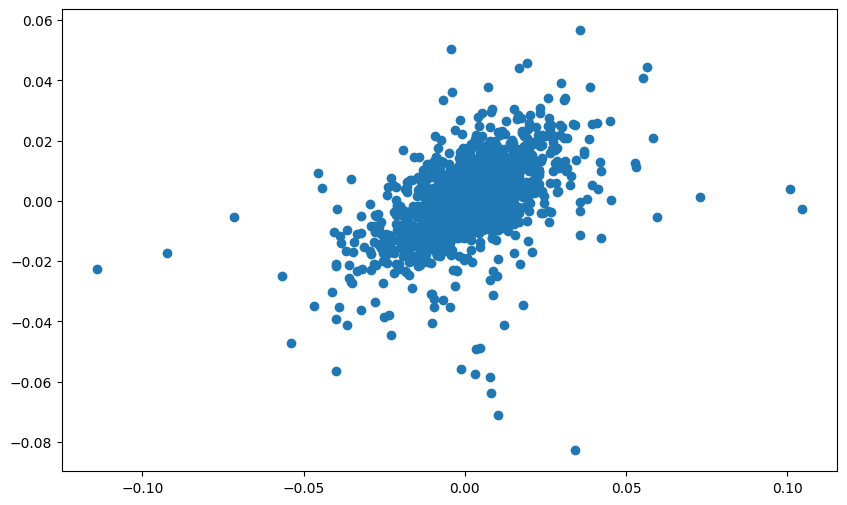

In [270]:
plt.scatter(returns['MSFT'], returns['IBM'])

In [271]:
returns['MSFT'].corr(returns['IBM'])

0.49976361144151144

# 공분산(covariance)
- https://ko.wikipedia.org/wiki/%EA%B3%B5%EB%B6%84%EC%82%B0

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Covariance_trends.svg/320px-Covariance_trends.svg.png'>

In [ ]:
returns['MSFT'].cov(returns['IBM'])

8.870655479703546e-05

In [ ]:
returns.MSFT.corr(returns.IBM)

0.49976361144151144

In [ ]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


In [ ]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


In [ ]:
returns.corrwith(returns.IBM)

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

In [ ]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

### Unique Values, Value Counts, and Membership

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [ ]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [ ]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

In [ ]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
mask = obj.isin(['b', 'c'])

In [ ]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [ ]:

obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In [ ]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## Conclusion

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

NameError: ignored

# End